**DEMO FOR CNN**

In [ ]:
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
#Getting the mnist dataset
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshape data to have a single channel
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


60000
28
28


In [ ]:
# determine the shape of the input images
in_shape = x_train.shape[1:]
print(in_shape)

(28, 28, 1)


In [ ]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

(28, 28, 1) 10


In [ ]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# fit the model
model.fit(x_train, y_train, epochs=1, batch_size=500, verbose=0)


In [ ]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('loss:%.3f' %loss)

Accuracy: 0.980
loss:0.064


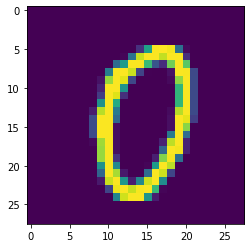

In [ ]:
from matplotlib import pyplot
import numpy as np
pyplot.imshow(np.reshape(x_train[1000], (28, 28)))

In [ ]:
yhat = model.predict([x_train[1000].reshape(1,28,28,1)])
print('Predicted: %.3f' % argmax(yhat))


Predicted: 0.000
